In [1]:
import pandas as pd
df = pd.read_csv("weather.csv")  
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


In [2]:
from sklearn.preprocessing import LabelEncoder

# Create the LabelEncoder instance
le = LabelEncoder()

# Fit and transform the 'weather' column, and replace it with encoded values
df['weather'] = le.fit_transform(df['weather'])

# Display the updated DataFrame
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2


In [3]:
df['date'] = pd.to_datetime(df['date'])
df

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2
1458,2015-12-29,0.0,7.2,0.6,2.6,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,4


In [4]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [5]:
df.fillna(method='ffill',inplace=True)

C:\Users\muham\AppData\Local\Temp\ipykernel_11860\4116506308.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill',inplace=True)


In [62]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
le = LabelEncoder()
df['weather_encoded']= le.fit_transform(df['weather'])
df

,date,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,2012-01-01,0.0,12.8,5.0,4.7,0,0
1,2012-01-02,10.9,10.6,2.8,4.5,2,2
2,2012-01-03,0.8,11.7,7.2,2.3,2,2
3,2012-01-04,20.3,12.2,5.6,4.7,2,2
4,2012-01-05,1.3,8.9,2.8,6.1,2,2
...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,2,2
1457,2015-12-28,1.5,5.0,1.7,1.3,2,2
1458,2015-12-29,0.0,7.2,0.6,2.6,1,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,4,4


In [7]:
print(df.describe())
print(df['weather'].value_counts())

                      date  precipitation     temp_max     temp_min  \
count                 1461    1461.000000  1461.000000  1461.000000   
mean   2013-12-31 00:00:00       3.029432    16.439083     8.234771   
min    2012-01-01 00:00:00       0.000000    -1.600000    -7.100000   
25%    2012-12-31 00:00:00       0.000000    10.600000     4.400000   
50%    2013-12-31 00:00:00       0.000000    15.600000     8.300000   
75%    2014-12-31 00:00:00       2.800000    22.200000    12.200000   
max    2015-12-31 00:00:00      55.900000    35.600000    18.300000   
std                    NaN       6.680194     7.349758     5.023004   

              wind      weather  weather_encoded  
count  1461.000000  1461.000000      1461.000000  
mean      3.241136     2.752225         2.752225  
min       0.400000     0.000000         0.000000  
25%       2.200000     2.000000         2.000000  
50%       3.000000     2.000000         2.000000  
75%       4.000000     4.000000         4.000000  
max

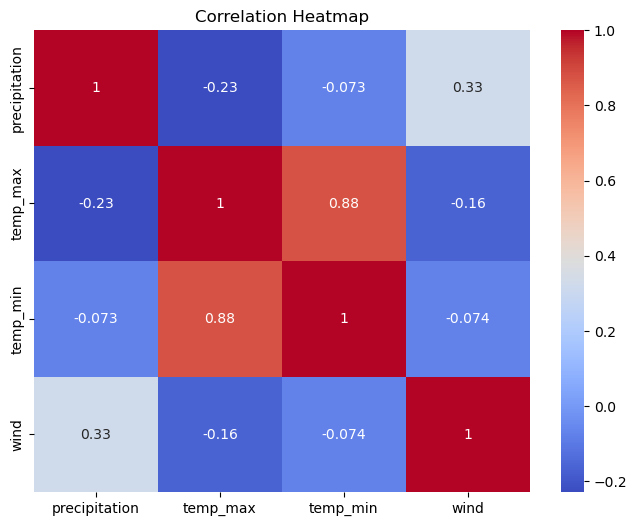

In [8]:
#correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df[['precipitation','temp_max','temp_min','wind']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
            

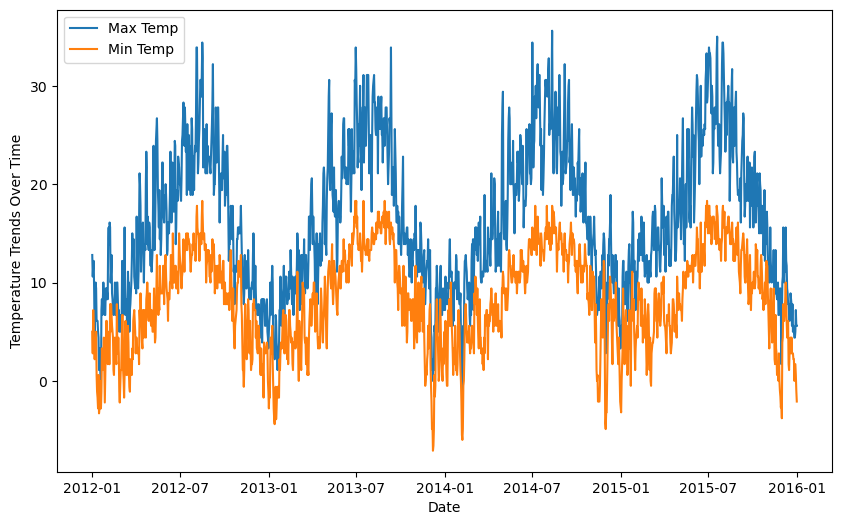

In [9]:
#visualization

plt.figure(figsize=(10,6))
plt.plot(df['date'], df['temp_max'], label='Max Temp')
plt.plot(df['date'], df['temp_min'], label='Min Temp')
plt.xlabel("Date")
plt.ylabel("Temperature Trends Over Time")
plt.legend()
plt.show()

C:\Users\muham\AppData\Local\Temp\ipykernel_11860\11660275.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weather', data=df, palette='viridis')


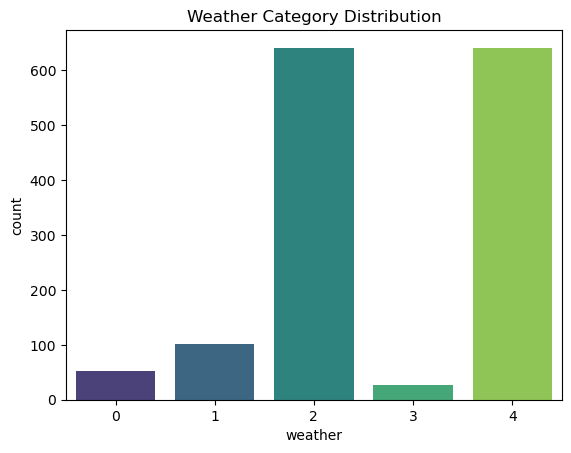

In [10]:

sns.countplot(x='weather', data=df, palette='viridis')
plt.title("Weather Category Distribution")
plt.show()

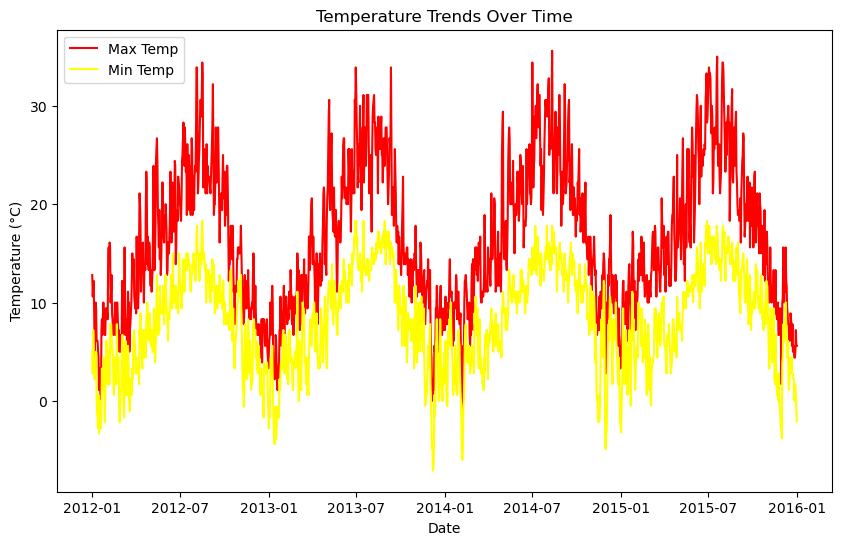

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['temp_max'], label='Max Temp',color='red') 
plt.plot(df['date'], df['temp_min'], label='Min Temp',color='yellow') 
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Trends Over Time")
plt.legend()
plt.show()

C:\Users\muham\AppData\Local\Temp\ipykernel_11860\2342255601.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weather',data=df, palette='coolwarm')


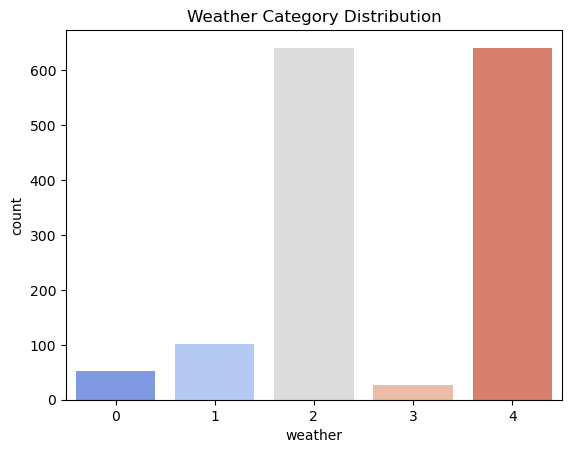

In [12]:
#WEATHER CATEGORY DISTRIBUTION
sns.countplot(x='weather',data=df, palette='coolwarm')
plt.title("Weather Category Distribution")
plt.show()

In [44]:
#Ml Prediction
X = df[['precipitation','temp_max','temp_min','wind']]
y = df['weather']

In [46]:
X

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [32]:
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int32

In [64]:
# Scale features (important for SVM, k-NN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [74]:
X_scaled

array([[-0.45364986, -0.49529914, -0.64421175,  1.01497975],
       [ 1.17859791, -0.79473121, -1.08234662,  0.87583314],
       [-0.33385186, -0.64501518, -0.20607688, -0.65477956],
       ...,
       [-0.45364986, -1.25748987, -1.52048149, -0.44605965],
       [-0.45364986, -1.47525865, -1.83912504,  0.11052679],
       [-0.45364986, -1.47525865, -2.05819247,  0.18010009]])

In [76]:
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather_encoded, Length: 1461, dtype: int64

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [82]:
#define models
models ={
    "Logistic Regerssion":LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM":SVC()
}

In [84]:
# Train and evaluate models
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))


Model: Logistic Regerssion
Accuracy: 0.7781569965870307
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00        25
           2       0.87      0.85      0.86       120
           3       1.00      0.12      0.22         8
           4       0.71      0.95      0.82       131

    accuracy                           0.78       293
   macro avg       0.52      0.39      0.38       293
weighted avg       0.70      0.78      0.72       293


Model: Decision Tree
Accuracy: 0.7440273037542662
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.25      0.24      0.24        25
           2       0.90      0.90      0.90       120
           3       0.43      0.38      0.40         8
           4       0.77      0.77      0.77       131

    accuracy                 

C:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.25      0.11      0.15         9
           1       0.40      0.08      0.13        25
           2       0.93      0.93      0.93       120
           3       0.67      0.25      0.36         8
           4       0.76      0.94      0.84       131

    accuracy                           0.82       293
   macro avg       0.60      0.46      0.48       293
weighted avg       0.78      0.82      0.78       293


Model: Gradient Boosting
Accuracy: 0.8156996587030717
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.11      0.18         9
           1       0.20      0.04      0.07        25
           2       0.93      0.92      0.92       120
           3       0.40      0.25      0.31         8
           4       0.77      0.95      0.85       131

    accuracy                           0.82       293
   macro avg       0.56     

C:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\muham\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


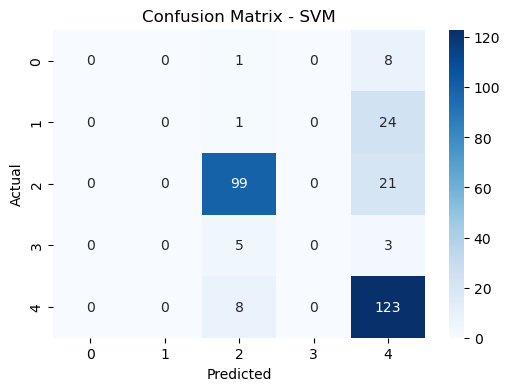

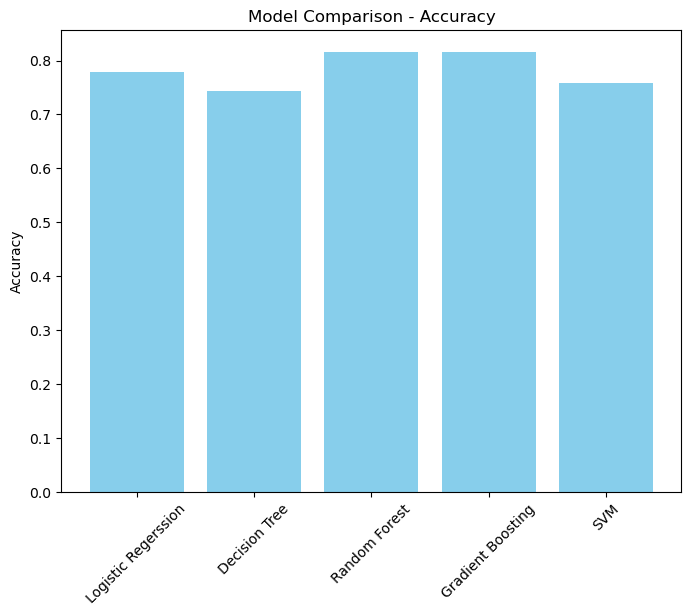

In [107]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `y_test`, `y_pred`, `le`, `model_name`, and `results` are defined
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f"Confusion Matrix - {model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ------------------ Compare Model Performance ------------------
# Plot accuracy comparison
plt.figure(figsize=(8, 6))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.title("Model Comparison - Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()



In [109]:
single_sample = pd.DataFrame({
    'precipitation': [0.0],  # Example values
    'temp_max': [12.8],
    'temp_min': [5.0],
    'wind': [4.7]
})

# Preprocess the single sample
single_sample_scaled = scaler.transform(single_sample)

# Predict using all models
print("\nPrediction on Single Row Sample:")
single_predictions = {}

# Get predictions for each model
for model_name, model in models.items():
    # Predict encoded label
    pred_encoded = model.predict(single_sample_scaled)
    
    # Decode to original label (text)
    pred_decoded = le.inverse_transform(pred_encoded)
    
    # Store the decoded label
    single_predictions[model_name] = pred_decoded[0]
    
    # Print the prediction for the current model
    print(f"{model_name}: {pred_decoded[0]}")

# Combine the original sample data with predictions
single_sample_predictions = single_sample.copy()
for model_name, pred in single_predictions.items():
    single_sample_predictions[f"Prediction_{model_name}"] = [pred]

# Display the weather labels mapping (text format)
labels_df = pd.DataFrame({
    "Encoded Value": range(len(le.classes_)),
    "Label": le.classes_
})
print("\nWeather Labels Mapping:")
print(labels_df)

# Display the final prediction results
print("\nPrediction Results for Single Row:")
print(single_sample_predictions)


Prediction on Single Row Sample:
Logistic Regerssion: 4
Decision Tree: 0
Random Forest: 0
Gradient Boosting: 4
SVM: 4

Weather Labels Mapping:
   Encoded Value  Label
0              0      0
1              1      1
2              2      2
3              3      3
4              4      4

Prediction Results for Single Row:
   precipitation  temp_max  temp_min  wind  Prediction_Logistic Regerssion  \
0            0.0      12.8       5.0   4.7                               4   

   Prediction_Decision Tree  Prediction_Random Forest  \
0                         0                         0   

   Prediction_Gradient Boosting  Prediction_SVM  
0                             4               4  


In [119]:
import pickle
pickle.dump(df.to_dict(), open('fazeem.pkl','wb'))